## Project Name: House Prices: Advanced Regression Techniques

##### Problem Statement ##############

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement
 ceiling or the proximity to an east-west railroad.But this playground competition's dataset proves that 
much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, 
this competition challenges you to predict the final price of each home.


**The main aim of this project is to predict the house price based on various features which we will discuss as we go ahead**

#### Dataset to downloaded from the below link
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [1]:
##3 Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
df_train = pd.concat((train, test))
df_train.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0,GasA,Ex,Y,SBrkr,796,566,0,1362,1.0,0.0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2.0,480.0,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369.0,Unf,0.0,317.0,1686.0,GasA,Ex,Y,SBrkr,1694,0,0,1694,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2.0,636.0,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,Gd,Y,FuseF,1022,752,0,1774,0.0,0.0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2.0,468.0,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420,Pave,NaN,

In [3]:
df_train["Neighborhood"].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

In [4]:
df_train.shape

(2919, 81)

In [5]:
train.shape

(1460, 81)

## EDA and Feature Engineering

In [6]:
duplicate = df_train[df_train.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [8]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


### Handling numerical  Missing values

**1. For Continious**

In [9]:
missing_values_continious = [feature for feature in df_train.columns if df_train[feature].dtype != "O" and len(df_train[feature].unique()) >20 and df_train[feature].isnull().sum()>0]
missing_values_continious

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GarageYrBlt',
 'GarageArea',
 'SalePrice']

In [10]:
for feature in missing_values_continious:
    print(feature, round(df_train[feature].isnull().mean(),4)*100)

LotFrontage 16.650000000000002
MasVnrArea 0.79
BsmtFinSF1 0.03
BsmtFinSF2 0.03
BsmtUnfSF 0.03
TotalBsmtSF 0.03
GarageYrBlt 5.45
GarageArea 0.03
SalePrice 49.980000000000004


In [11]:
for feature in missing_values_continious:
    print(feature , len(df_train[feature].unique()))

LotFrontage 129
MasVnrArea 445
BsmtFinSF1 992
BsmtFinSF2 273
BsmtUnfSF 1136
TotalBsmtSF 1059
GarageYrBlt 104
GarageArea 604
SalePrice 664


In [12]:
for feature in missing_values_continious:
    if feature == "SalePrice":
        pass
    else:        
        median_value = df_train[feature].median()
        df_train[feature].fillna(median_value,inplace=True)    
df_train.drop("Id" , inplace=True , axis = 1)

**2. For Descrete**

In [13]:
missing_values_descrete = [feature for feature in df_train.columns if df_train[feature].dtype != "O" and len(df_train[feature].unique()) <20 and df_train[feature].isnull().sum()>0]
missing_values_descrete

['BsmtFullBath', 'BsmtHalfBath', 'GarageCars']

In [14]:
for feature in missing_values_descrete:
    print(feature, round(df_train[feature].isnull().mean(),4)*100)

BsmtFullBath 0.06999999999999999
BsmtHalfBath 0.06999999999999999
GarageCars 0.03


In [15]:
for feature in missing_values_descrete:
    print(feature , len(df_train[feature].unique()))

BsmtFullBath 5
BsmtHalfBath 4
GarageCars 7


In [16]:
for feature in missing_values_descrete:
    mode_value = df_train[feature].mode()[0]
    df_train[feature].fillna(mode_value,inplace=True)

### Handling categorical missing values

In [17]:
missing_values_c = [feature for feature in df_train.columns if df_train[feature].dtype == "O" and df_train[feature].isnull().sum()>0]
missing_values_c

['MSZoning',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [18]:
for feature in missing_values_c:
    print(feature, round(df_train[feature].isnull().mean(),4)*100)

MSZoning 0.13999999999999999
Alley 93.22
Utilities 0.06999999999999999
Exterior1st 0.03
Exterior2nd 0.03
MasVnrType 0.8200000000000001
BsmtQual 2.77
BsmtCond 2.81
BsmtExposure 2.81
BsmtFinType1 2.71
BsmtFinType2 2.74
Electrical 0.03
KitchenQual 0.03
Functional 0.06999999999999999
FireplaceQu 48.65
GarageType 5.38
GarageFinish 5.45
GarageQual 5.45
GarageCond 5.45
PoolQC 99.66000000000001
Fence 80.44
MiscFeature 96.39999999999999
SaleType 0.03


In [19]:
for feature in missing_values_c:
    mode_value = df_train[feature].mode()[0]
    df_train[feature].fillna(mode_value,inplace=True)    
df_train.drop(["Alley" ,"PoolQC", "Fence" , "MiscFeature"  , "FireplaceQu" ] , axis = 1 , inplace = True)

In [20]:
df_train.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1459
Length: 75, dtype: int64

In [21]:
df_train.shape

(2919, 75)

### Handling year feature

In [22]:
year = [feature for feature in df_train.columns if "Yr" in feature or "Year" in feature] 
year

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [23]:
for feature in year:
    print(feature, len(df_train[feature].unique()) , df_train[feature].dtype)

YearBuilt 118 int64
YearRemodAdd 61 int64
GarageYrBlt 103 float64
YrSold 5 int64


Text(0.5, 1.0, 'House Price vs YearSold')

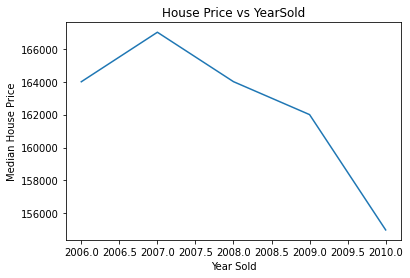

In [24]:
df_train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

In [25]:
for feature in year:       
    df_train[feature]=df_train['YrSold']-df_train[feature]
df_train.drop("YrSold", axis = 1 , inplace = True)

In [26]:
df_train.shape

(2919, 74)

### Handling continious values

In [27]:
continious = [feature for feature in df_train.columns if len(df_train[feature].unique())>20 and df_train[feature].dtype != "O" and feature not in year]
continious

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

C:\Users\Prem\Anaconda3\envs\talent_shiksha\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


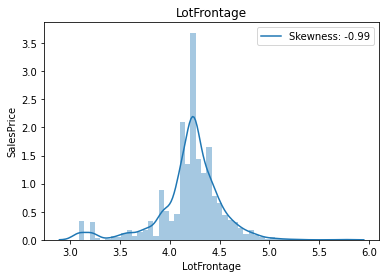

C:\Users\Prem\Anaconda3\envs\talent_shiksha\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


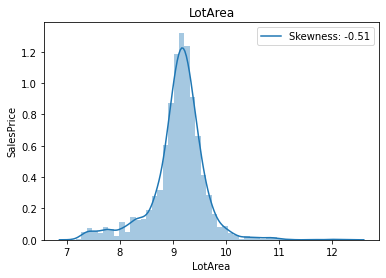

C:\Users\Prem\Anaconda3\envs\talent_shiksha\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


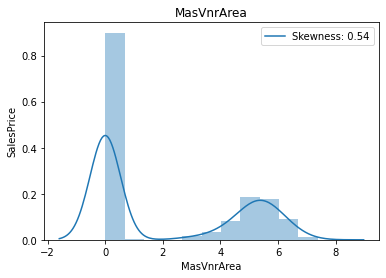

C:\Users\Prem\Anaconda3\envs\talent_shiksha\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


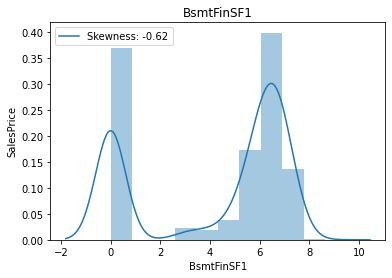

C:\Users\Prem\Anaconda3\envs\talent_shiksha\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


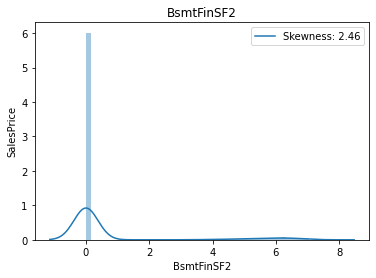

C:\Users\Prem\Anaconda3\envs\talent_shiksha\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


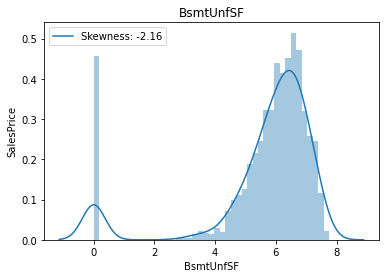

C:\Users\Prem\Anaconda3\envs\talent_shiksha\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


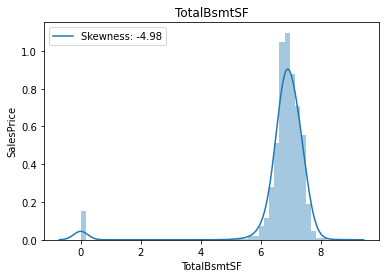

C:\Users\Prem\Anaconda3\envs\talent_shiksha\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


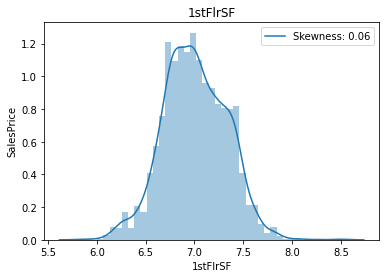

C:\Users\Prem\Anaconda3\envs\talent_shiksha\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


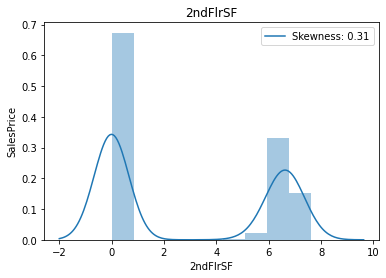

C:\Users\Prem\Anaconda3\envs\talent_shiksha\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


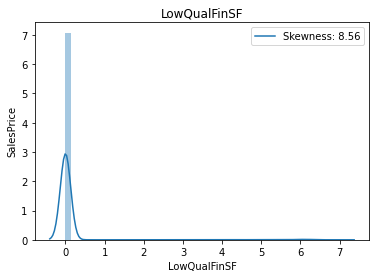

C:\Users\Prem\Anaconda3\envs\talent_shiksha\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


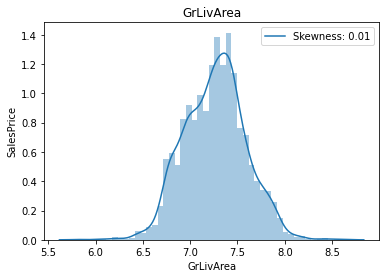

C:\Users\Prem\Anaconda3\envs\talent_shiksha\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


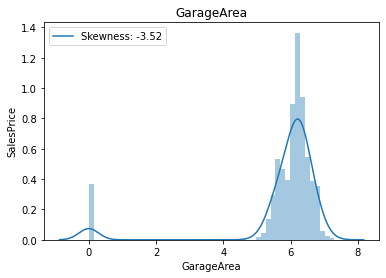

C:\Users\Prem\Anaconda3\envs\talent_shiksha\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


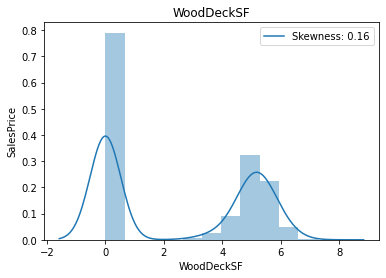

C:\Users\Prem\Anaconda3\envs\talent_shiksha\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


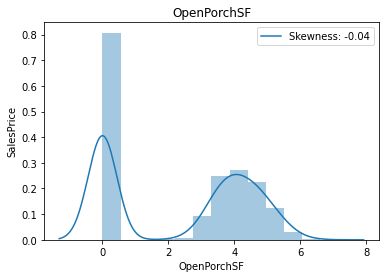

C:\Users\Prem\Anaconda3\envs\talent_shiksha\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


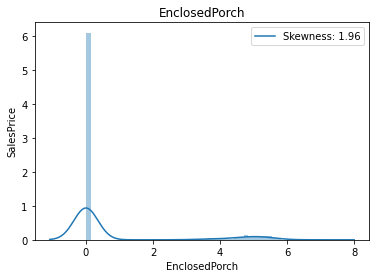

C:\Users\Prem\Anaconda3\envs\talent_shiksha\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


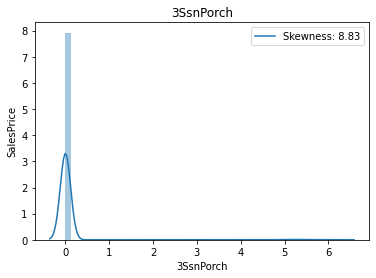

C:\Users\Prem\Anaconda3\envs\talent_shiksha\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


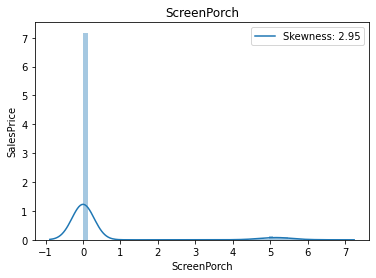

C:\Users\Prem\Anaconda3\envs\talent_shiksha\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


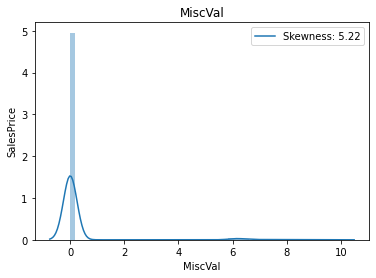

C:\Users\Prem\Anaconda3\envs\talent_shiksha\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


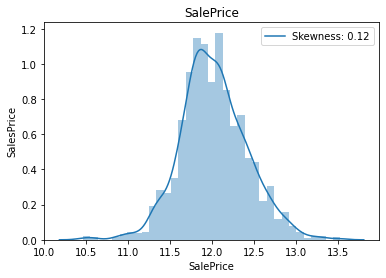

In [28]:
## We will be using logarithmic transformation
for feature in continious:
    data = df_train.copy()
    data[feature]=np.log1p(data[feature])
    ax = sns.distplot(data[feature])
    ax.legend(["Skewness: {:0.2f}".format(data[feature].skew())])
    plt.xlabel(feature)
    plt.ylabel('SalesPrice')
    plt.title(feature)
    plt.show() 

In [29]:
skewed = [feature for feature in continious if data[feature].skew()<1]
skewed

['BsmtUnfSF', '2ndFlrSF', 'GarageArea', 'SalePrice']

In [30]:
for feature in continious:
    if feature == "SalePrice":
        pass
    else:        
        df_train[feature] = np.log1p(df_train[feature])

In [31]:
df_train.shape

(2919, 74)

(19.5, -0.5)

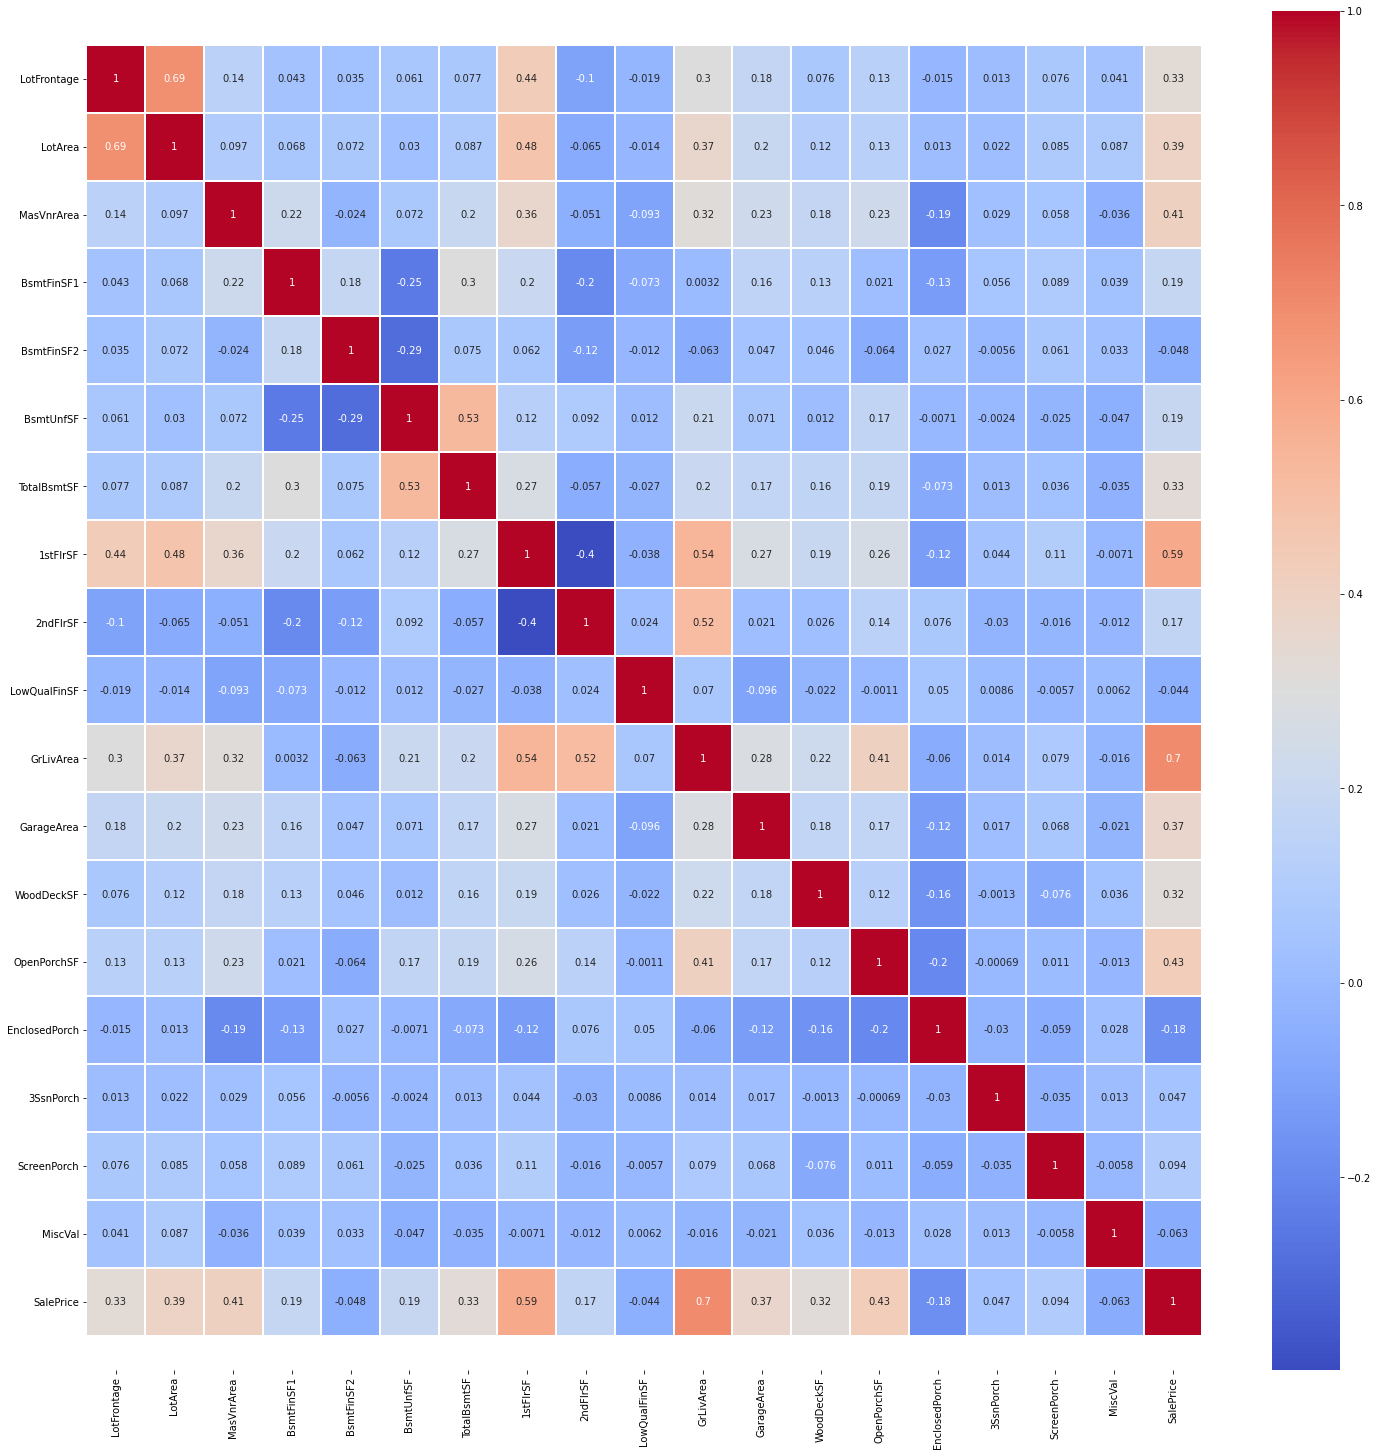

In [32]:
# correlation heatmap
plt.figure(figsize=(25,25))
ax = sns.heatmap(df_train[continious].corr(), cmap = "coolwarm", annot=True, linewidth=2)

# to fix the bug "first and last row cut in half of heatmap plot"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [33]:
# correlation heatmap of higly correlated features with SalePrice
hig_corr = df_train[continious].corr()
hig_corr_features = hig_corr.index[abs(hig_corr["SalePrice"]) >= 0.45]
hig_corr_features

Index(['1stFlrSF', 'GrLivArea', 'SalePrice'], dtype='object')

### Handling categorical variables

In [34]:
categorical = [feature for feature in df_train.columns if df_train[feature].dtype == "O"]
len(categorical)

38

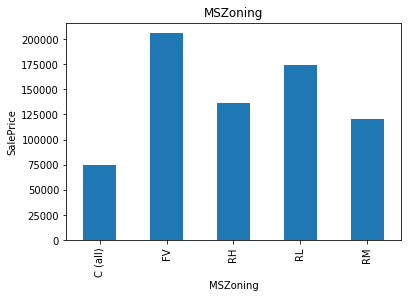

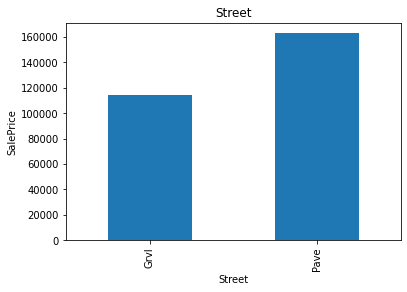

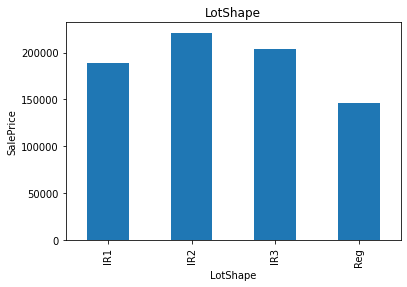

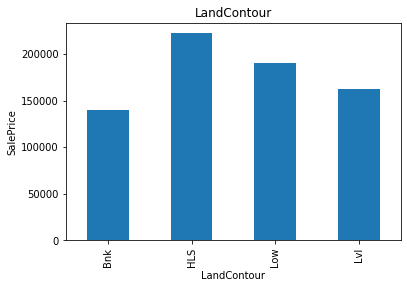

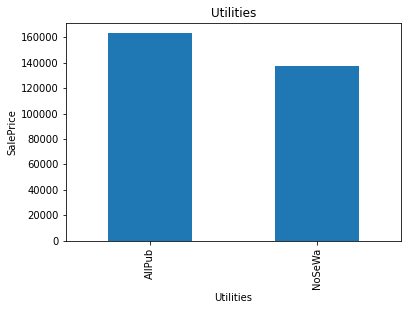

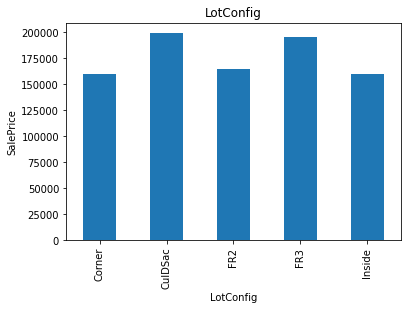

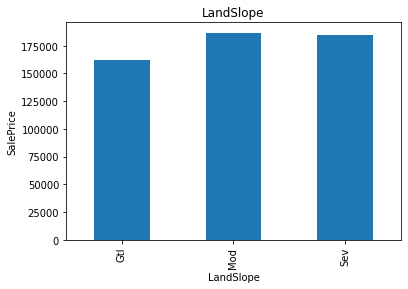

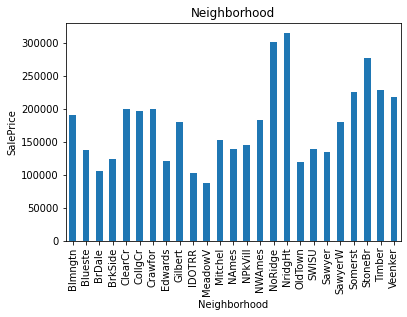

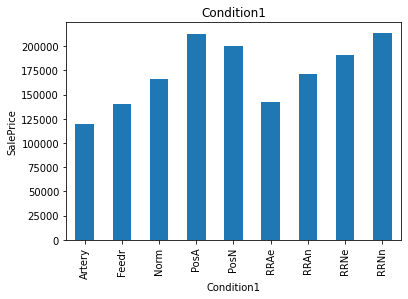

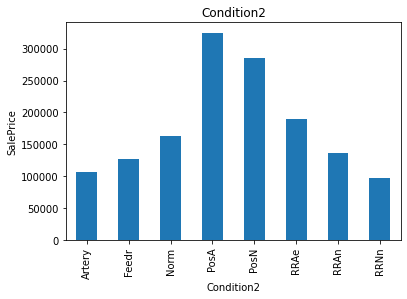

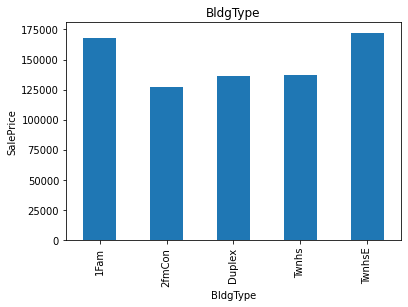

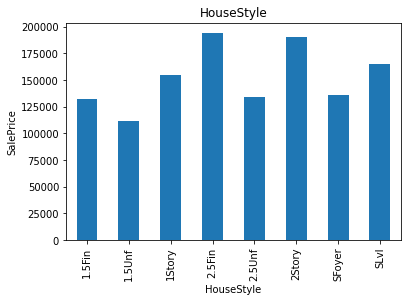

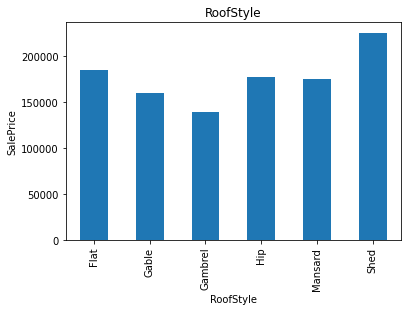

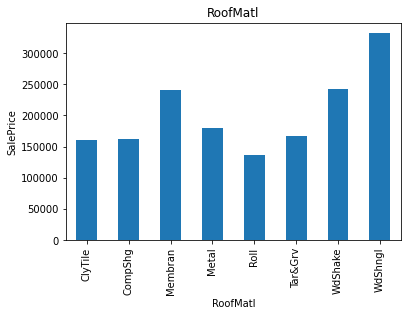

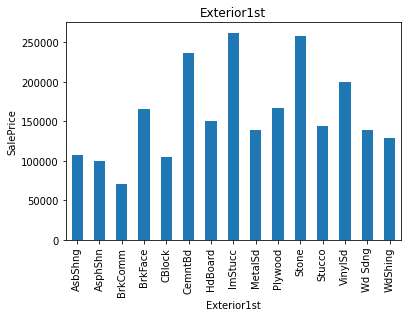

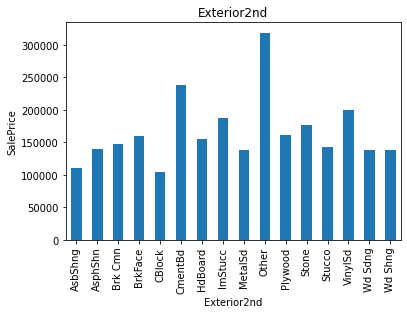

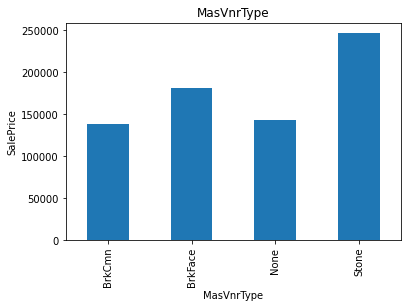

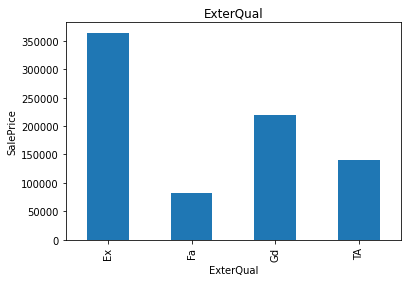

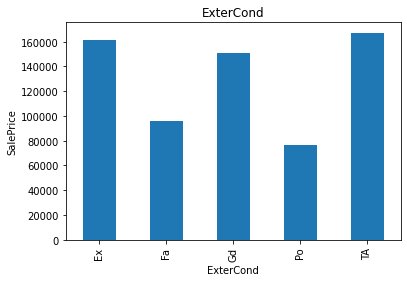

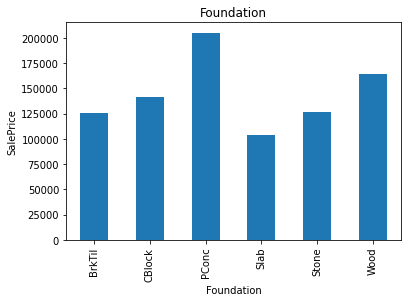

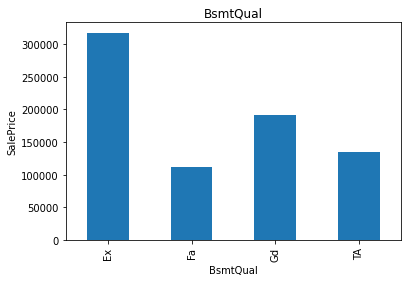

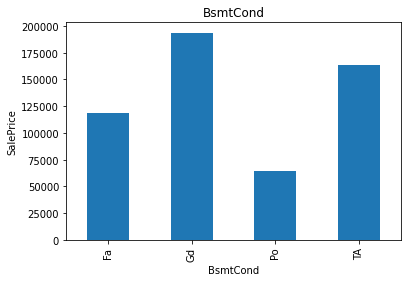

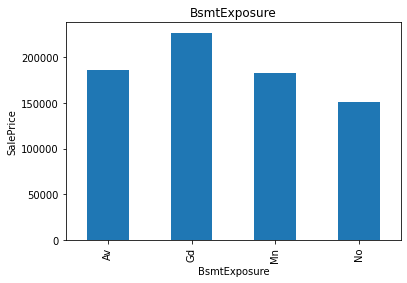

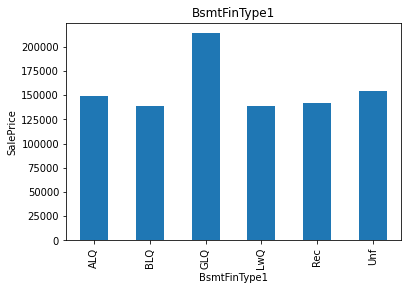

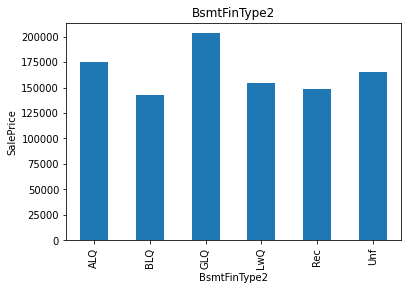

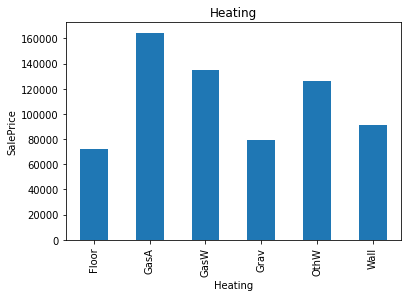

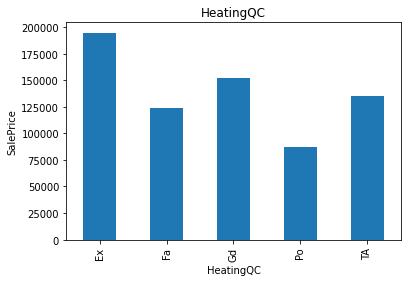

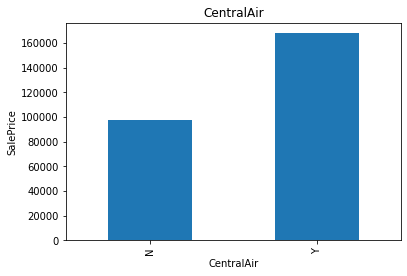

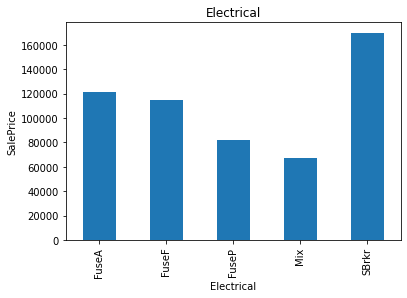

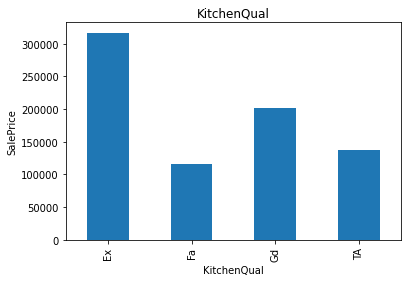

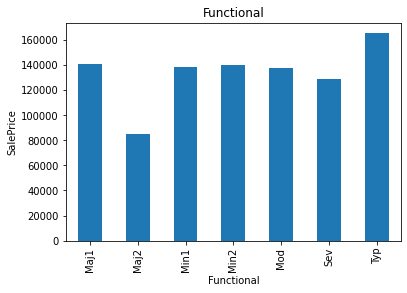

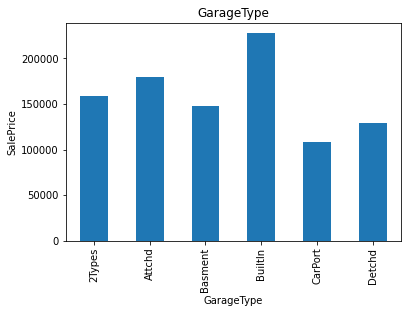

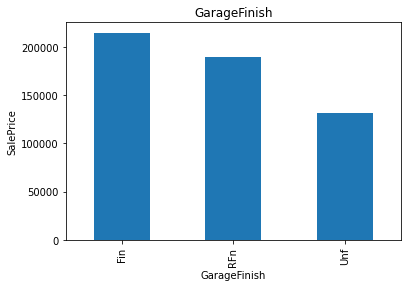

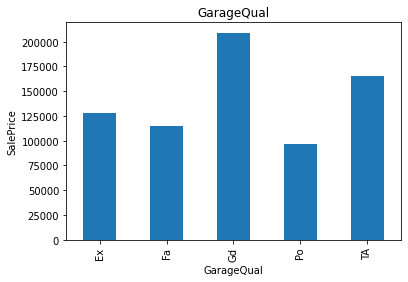

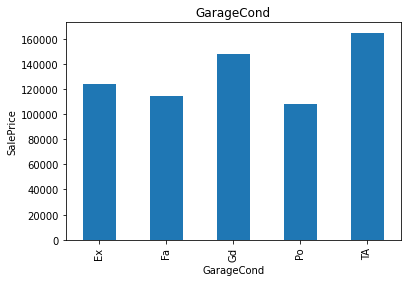

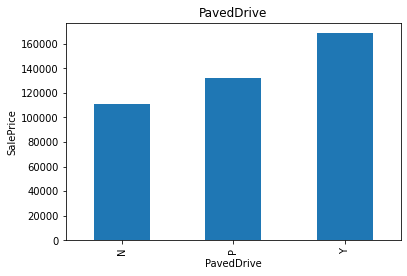

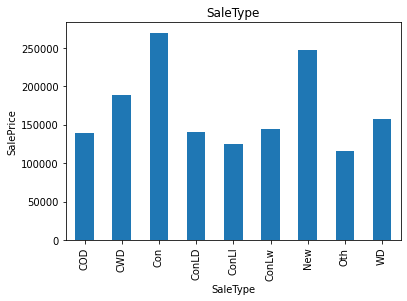

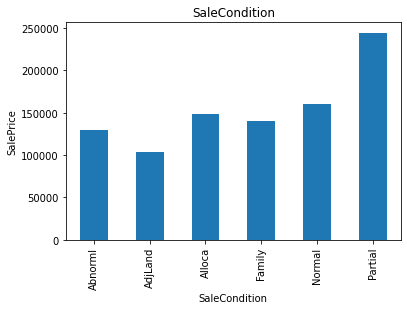

In [35]:
for feature in categorical:
    df_train.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

**ORDINAL**

In [36]:
from pandas.api.types import CategoricalDtype

In [37]:
df_train['BsmtCond'] = df_train['BsmtCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes

In [38]:
df_train['BsmtCond'].value_counts()

3    2688
4     122
2     104
1       5
Name: BsmtCond, dtype: int64

In [39]:
df_train['BsmtExposure'] = df_train['BsmtExposure'].astype(CategoricalDtype(categories=['NA', 'Mn', 'Av', 'Gd'], ordered = True)).cat.codes
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df_train['BsmtQual'] = df_train['BsmtQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_train['ExterQual'] = df_train['ExterQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_train['ExterCond'] = df_train['ExterCond'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_train['Functional'] = df_train['Functional'].astype(CategoricalDtype(categories=['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod','Min2','Min1', 'Typ'], ordered = True)).cat.codes
df_train['GarageCond'] = df_train['GarageCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_train['GarageQual'] = df_train['GarageQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_train['GarageFinish'] = df_train['GarageFinish'].astype(CategoricalDtype(categories=['NA', 'Unf', 'RFn', 'Fin'], ordered = True)).cat.codes
df_train['HeatingQC'] = df_train['HeatingQC'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_train['KitchenQual'] = df_train['KitchenQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_train['PavedDrive'] = df_train['PavedDrive'].astype(CategoricalDtype(categories=['N', 'P', 'Y'], ordered = True)).cat.codes
df_train['Utilities'] = df_train['Utilities'].astype(CategoricalDtype(categories=['ELO', 'NASeWa', 'NASeWr', 'AllPub'], ordered = True)).cat.codes

In [40]:
ordinal = ["BsmtCond" , "BsmtExposure" , "BsmtFinType1" , "BsmtFinType2" , "BsmtQual" , "ExterQual" , "ExterCond" , "Functional",
          "GarageCond" , "GarageQual" , "GarageFinish" , "HeatingQC" , "KitchenQual" , "PavedDrive" , "Utilities"]

In [41]:
len(ordinal)

15

In [42]:
df_train.shape

(2919, 74)

**Nominal**

* **One hot encoding**

In [43]:
nominal = [feature for feature in categorical if feature not in ordinal ]

In [44]:
nominal = [feature for feature in categorical if feature not in ordinal]
for feature in nominal:
    print(feature , len(df_train[feature].unique()))

MSZoning 5
Street 2
LotShape 4
LandContour 4
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 4
Foundation 6
Heating 6
CentralAir 2
Electrical 5
GarageType 6
SaleType 9
SaleCondition 6


In [45]:
new_nominal = ["Neighborhood" , "Exterior1st" , "Exterior2nd"]
nominal1 = [feature for feature in nominal if feature not in new_nominal]

In [46]:
len(nominal)

23

In [47]:
len(nominal1)

20

In [48]:
nominal_variable = pd.get_dummies(columns = nominal1 , data = df_train, drop_first=True)
nominal_variable.drop(new_nominal , axis = 1 , inplace = True)

In [49]:
nominal_variable.shape

(2919, 142)

* **One hot encoding with many variables**

In [50]:
top_10_Neighborhood = [x for x in df_train.Neighborhood.value_counts().sort_values(ascending=False).head(10).index]
top_10_Exterior1st = [x for x in df_train.Exterior1st.value_counts().sort_values(ascending=False).head(10).index]
top_10_Exterior2nd = [x for x in df_train.Exterior2nd.value_counts().sort_values(ascending=False).head(10).index]


for label in top_10_Neighborhood:
    df_train[label]= np.where(df_train["Neighborhood"]==label,1,0)
    
for label in top_10_Exterior1st:
    df_train[label]= np.where(df_train["Exterior1st"]==label,1,0)
    
#for label in top_10_Exterior2nd:
    #df_train[label]= np.where(df_train["Exterior2nd"]==label,1,0)
    
#df_train[top_10_Exterior2nd].head()

In [51]:
df_train[top_10_Exterior1st].head()

,VinylSd,MetalSd,HdBoard,Wd Sdng,Plywood,CemntBd,BrkFace,WdShing,AsbShng,Stucco
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [52]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,NAmes,CollgCr,OldTown,Edwards,Somerst,NridgHt,Gilbert,Sawyer,NWAmes,SawyerW,VinylSd,MetalSd,HdBoard,Wd Sdng,Plywood,CemntBd,BrkFace,WdShing,AsbShng,Stucco
0,60,RL,4.189655,9.042040,Pave,Reg,Lvl,3,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,3,2,PConc,4,3,-1,6,6.561031,1,0.0,5.017280,6.753438,GasA,4,Y,SBrkr,6.753438,6.751101,0.0,7.444833,1.0,0.0,2,1,3,1,3,8,7,0,Attchd,5.0,2,2.0,6.308098,3,3,2,0.000000,4.127134,0.000000,0.0,0.0,0,0.0,2,WD,Normal,208500.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,20,RL,4.394449,9.169623,Pave,Reg,Lvl,3,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.000000,2,2,CBlock,4,3,3,5,6.886532,1,0.0,5.652489,7.141245,GasA,4,Y,SBrkr,7.141245,0.000000,0.0,7.141245,0.0,1.0,2,0,3,1,2,6,7,1,Attchd,31.0,2,2.0,6.133398,3,3,2,5.700444,0.000000,0.000000,0.0,0.0,0,0.0,5,WD,Normal,181500.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,60,RL,4.234107,9.328212,Pave,IR1,Lvl,3,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,3,2,PConc,4,3,1,6,6.188264,1,0.0,6.075346,6.825460,GasA,4,Y,SBrkr,6.825460,6.765039,0.0,7.488294,1.0,0.0,2,1,3,1,3,6,7,1,Attchd,7.0,2,2.0,6.411818,3,3,2,0.000000,3.761200,0.000000,0.0,0.0,0,0.0,9,WD,Normal,223500.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,70,RL,4.110874,9.164401,Pave,IR1,Lvl,3,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,2,2,BrkTil,3,4,-1,5,5.379897,1,0.0,6.293419,6.629363,GasA,3,Y,SBrkr,6.869014,6.629363,0.0,7.448916,1.0,0.0,1,0,3,1,3,7,7,1,Detchd,8.0,1,3.0,6.466145,3,3,2,0.000000,3.583519,5.609472,0.0,0.0,0,0.0,2,WD,Abnorml,140000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,60,RL,4.442651,9.565284,Pave,IR1,Lvl,3,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,3,2,PConc,4,3,2,6,6.486161,1,0.0,6.196444,7.044033,GasA,4,Y,SBrkr,7.044033,6.960348,0.0,7.695758,1.0,0.0,2,1,4,1,3,9,7,1,Attchd,8.0,2,3.0,6.729824,3,3,2,5.262690,4.442651,0.000000,0.0,0.0,0,0.0,12,WD,Normal,250000.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [53]:
df_train.drop(["Neighborhood" , "Exterior1st" , "Exterior2nd"] , axis = 1 , inplace = True)
df_train.drop(nominal1 , axis = 1 , inplace = True)

In [54]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,NAmes,CollgCr,OldTown,Edwards,Somerst,NridgHt,Gilbert,Sawyer,NWAmes,SawyerW,VinylSd,MetalSd,HdBoard,Wd Sdng,Plywood,CemntBd,BrkFace,WdShing,AsbShng,Stucco
0,60,4.189655,9.042040,3,7,5,5,5,5.283204,3,2,4,3,-1,6,6.561031,1,0.0,5.017280,6.753438,4,6.753438,6.751101,0.0,7.444833,1.0,0.0,2,1,3,1,3,8,7,0,5.0,2,2.0,6.308098,3,3,2,0.000000,4.127134,0.000000,0.0,0.0,0,0.0,2,208500.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,20,4.394449,9.169623,3,6,8,31,31,0.000000,2,2,4,3,3,5,6.886532,1,0.0,5.652489,7.141245,4,7.141245,0.000000,0.0,7.141245,0.0,1.0,2,0,3,1,2,6,7,1,31.0,2,2.0,6.133398,3,3,2,5.700444,0.000000,0.000000,0.0,0.0,0,0.0,5,181500.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,60,4.234107,9.328212,3,7,5,7,6,5.093750,3,2,4,3,1,6,6.188264,1,0.0,6.075346,6.825460,4,6.825460,6.765039,0.0,7.488294,1.0,0.0,2,1,3,1,3,6,7,1,7.0,2,2.0,6.411818,3,3,2,0.000000,3.761200,0.000000,0.0,0.0,0,0.0,9,223500.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,70,4.110874,9.164401,3,7,5,91,36,0.000000,2,2,3,4,-1,5,5.379897,1,0.0,6.293419,6.629363,3,6.869014,6.629363,0.0,7.448916,1.0,0.0,1,0,3,1,3,7,7,1,8.0,1,3.0,6.466145,3,3,2,0.000000,3.583519,5.609472,0.0,0.0,0,0.0,2,140000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,60,4.442651,9.565284,3,8,5,8,8,5.860786,3,2,4,3,2,6,6.486161,1,0.0,6.196444,7.044033,4,7.044033,6.960348,0.0,7.695758,1.0,0.0,2,1,4,1,3,9,7,1,8.0,2,3.0,6.729824,3,3,2,5.262690,4.442651,0.000000,0.0,0.0,0,0.0,12,250000.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [55]:
train = pd.concat([nominal_variable , df_train] , axis = 1)

In [56]:
train.head()

,MSSubClass,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,NAmes,CollgCr,OldTown,Edwards,Somerst,NridgHt,Gilbert,Sawyer,NWAmes,SawyerW,VinylSd,MetalSd,HdBoard,Wd Sdng,Plywood,CemntBd,BrkFace,WdShing,AsbShng,Stucco
0,60,4.189655,9.042040,3,7,5,5,5,5.283204,3,2,4,3,-1,6,6.561031,1,0.0,5.017280,6.753438,4,6.753438,6.751101,0.0,7.444833,1.0,0.0,2,1,3,1,3,8,7,0,5.0,2,2.0,6.308098,3,3,2,0.000000,4.127134,0.000000,0.0,0.0,0,0.0,2,208500.0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,60,4.189655,9.042040,3,7,5,5,5,5.283204,3,2,4,3,-1,6,6.561031,1,0.0,5.017280,6.753438,4,6.753438,6.751101,0.0,7.444833,1.0,0.0,2,1,3,1,3,8,7,0,5.0,2,2.0,6.308098,3,3,2,0.000000,4.127134,0.000000,0.0,0.0,0,0.0,2,208500.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,20,4.394449,9.169623,3,6,8,31,31,0.000000,2,2,4,3,3,5,6.886532,1,0.0,5.652489,7.141245,4,7.141245,0.000000,0.0,7.141245,0.0,1.0,2,0,3,1,2,6,7,1,31.0,2,2.0,6.133398,3,3,2,5.700444,0.000000,0.000000,0.0,0.0,0,0.0,5,181500.0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,20,4.394449,9.169623,3,6,8,31,31,0.000000,2,2,4,3,3,5,6.886532,1,0.0,5.652489,7.141245,4,7.141245,0.000000,0.0,7.141245,0.0,1.0,2,0,3,1,2,6,7,1,31.0,2,2.0,6.133398,3,3,2,5.700444,0.000000,0.000000,0.0,

In [57]:
#preview the df
train = train.loc[:,~train.columns.duplicated()]
train.shape

(2919, 162)

In [58]:
train.head()

,MSSubClass,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,NAmes,CollgCr,OldTown,Edwards,Somerst,NridgHt,Gilbert,Sawyer,NWAmes,SawyerW,VinylSd,MetalSd,HdBoard,Wd Sdng,Plywood,CemntBd,BrkFace,WdShing,AsbShng,Stucco
0,60,4.189655,9.042040,3,7,5,5,5,5.283204,3,2,4,3,-1,6,6.561031,1,0.0,5.017280,6.753438,4,6.753438,6.751101,0.0,7.444833,1.0,0.0,2,1,3,1,3,8,7,0,5.0,2,2.0,6.308098,3,3,2,0.000000,4.127134,0.000000,0.0,0.0,0,0.0,2,208500.0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,20,4.394449,9.169623,3,6,8,31,31,0.000000,2,2,4,3,3,5,6.886532,1,0.0,5.652489,7.141245,4,7.141245,0.000000,0.0,7.141245,0.0,1.0,2,0,3,1,2,6,7,1,31.0,2,2.0,6.133398,3,3,2,5.700444,0.000000,0.000000,0.0,0.0,0,0.0,5,181500.0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,60,4.234107,9.328212,3,7,5,7,6,5.093750,3,2,4,3,1,6,6.188264,1,0.0,6.075346,6.825460,4,6.825460,6.765039,0.0,7.488294,1.0,0.0,2,1,3,1,3,6,7,1,7.0,2,2.0,6.411818,3,3,2,0.000000,3.761200,0.000000,0.0,0.0,0,0.0,9,223500.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,70,4.110874,9.164401,3,7,5,91,36,0.000000,2,2,3,4,-1,5,5.379897,1,0.0,6.293419,6.629363,3,6.869014,6.629363,0.0,7.448916,1.0,0.0,1,0,3,1,3,7,7,1,8.0,1,3.0,6.466145,3,3,2,0.000000,3.583519,5.609472,0.0,0.0,0,0.0,2,140000.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,60,4.442651,9.565284,3,8,5,8,8,5.860786,3,2,4,3,2,6

In [59]:
train.shape

(2919, 162)

## Feature Selection

In [60]:
train_df= train[:1460]
test1 = train[1460:]

print(train_df.shape)
print(test1.shape)
#print(len(y_train))

(1460, 162)
(1459, 162)


In [61]:
X = train_df.drop("SalePrice" , axis = 1)
y = train_df["SalePrice"]
test = test1.drop("SalePrice" , axis = 1)

In [62]:
X.shape

(1460, 161)

In [63]:
len(y)

1460

In [64]:
test1.head()

,MSSubClass,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,NAmes,CollgCr,OldTown,Edwards,Somerst,NridgHt,Gilbert,Sawyer,NWAmes,SawyerW,VinylSd,MetalSd,HdBoard,Wd Sdng,Plywood,CemntBd,BrkFace,WdShing,AsbShng,Stucco
0,20,4.394449,9.360741,3,5,6,49,49,0.000000,2,2,3,3,-1,3,6.150603,2,4.976734,5.602119,6.783325,2,6.799056,0.000000,0.0,6.799056,0.0,0.0,1,0,2,1,2,5,7,0,49.0,1,1.0,6.594413,3,3,2,4.948760,0.000000,0.0,0.0,4.795791,0,0.000000,6,NaN,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,20,4.406719,9.565775,3,6,6,52,52,4.691348,2,2,3,3,-1,5,6.828712,1,0.000000,6.008813,7.192934,2,7.192934,0.000000,0.0,7.192934,0.0,0.0,1,1,3,1,3,6,7,0,52.0,1,1.0,5.746203,3,3,2,5.976351,3.610918,0.0,0.0,0.000000,0,9.433564,6,NaN,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,60,4.317488,9.534668,3,5,5,13,12,0.000000,2,2,4,3,-1,6,6.674561,1,0.000000,4.927254,6.834109,3,6.834109,6.553933,0.0,7.396335,0.0,0.0,2,1,3,1,2,6,7,1,13.0,3,2.0,6.180017,3,3,2,5.361292,3.555348,0.0,0.0,0.000000,0,0.000000,3,NaN,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,60,4.369448,9.208238,3,6,6,12,12,3.044522,2,2,3,3,-1,6,6.401917,1,0.000000,5.783825,6.831954,4,6.831954,6.520621,0.0,7.380879,0.0,0.0,2,1,3,1,3,7,7,1,12.0,3,2.0,6.154858,3,3,2,5.888878,3.610918,0.0,0.0,0.000000,0,0.000000,6,NaN,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,120,3.784190,8.518392,

In [65]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [66]:
print(model.feature_importances_)

[2.36978395e-03 3.08543627e-03 8.81201722e-03 3.97887187e-06
 2.31429997e-01 4.65651904e-03 2.37774916e-02 5.19627388e-03
 2.43792280e-03 1.34690495e-01 1.04121961e-03 6.70626728e-02
 7.03046773e-04 5.40022379e-03 3.40266185e-03 9.16461285e-03
 6.61000446e-04 6.48934392e-04 2.06630489e-03 1.19175314e-02
 1.37576704e-03 2.24813400e-02 4.44655943e-03 4.06892228e-04
 7.83850001e-02 6.06941923e-03 1.01239140e-03 2.40238752e-02
 3.83826609e-03 5.19377592e-03 6.86688188e-04 8.07371313e-02
 1.30320747e-02 9.81699208e-04 1.53065136e-02 3.18783072e-03
 7.03049525e-03 8.59448172e-02 1.04935873e-02 2.84748220e-04
 1.41678721e-04 6.63950568e-04 3.02944806e-03 3.22215127e-03
 1.12099844e-03 7.69501464e-04 2.46904115e-03 4.93308881e-03
 2.10626779e-04 3.72628764e-03 2.62602496e-04 3.47005089e-05
 3.15920113e-03 3.78252130e-03 5.20570709e-05 2.68906154e-03
 1.85540172e-04 2.13410754e-03 8.64692109e-04 1.58715875e-03
 1.97653592e-03 1.29722006e-03 4.12263159e-04 3.52649527e-05
 1.46721280e-03 1.165946

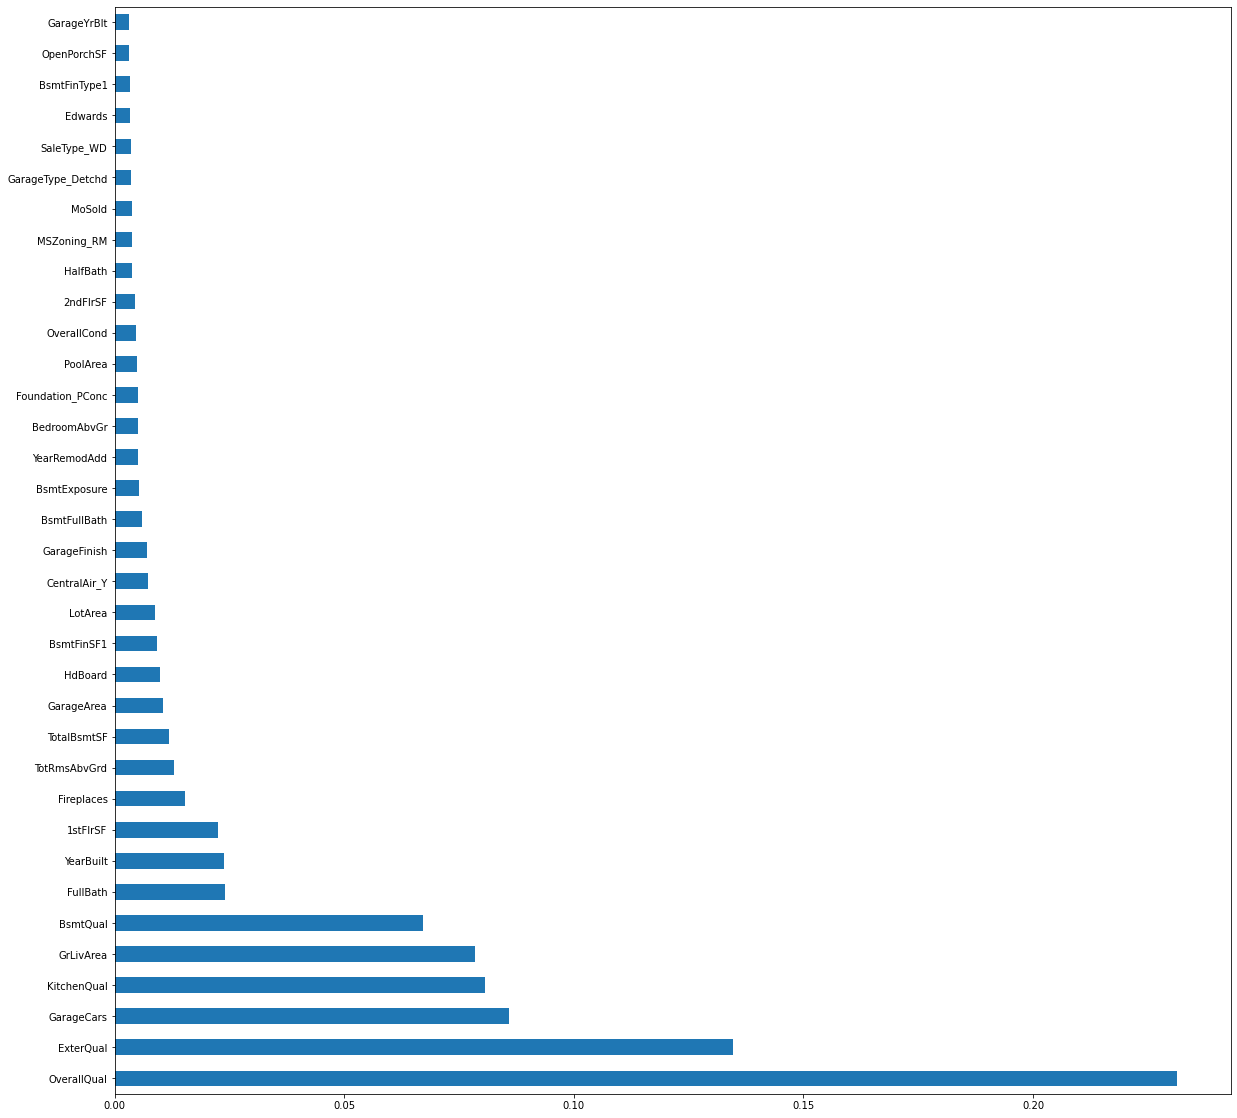

In [67]:
plt.figure(figsize = (20 , 20))
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(35).plot(kind='barh')
plt.show()

In [68]:
features = ranked_features.nlargest(23)

In [69]:
X = train_df[features.index]

In [70]:
X.shape

(1460, 23)

## Model Building

In [71]:
# split dataset into train and test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 5)

### Robost scaller

In [72]:
test1 = test1[features.index]

In [73]:
# scaling dataset with robust scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit_transform(X_train)
X = scaler.transform(X_test)
test1 = scaler.transform(test1)

### Linear Regression

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # for calculating mean_squared error
from sklearn.metrics import r2_score # for measering the goodness of best fit line

reg = LinearRegression()
reg.fit(X_train , y_train)

y_pred = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test , y_pred))

score=r2_score(y_test,y_pred)
print(f"value of R^2 is {score}")
print(f"rmse value is {rmse}")

value of R^2 is 0.8057180728504594
rmse value is 35509.0268689228


### Random Forest

In [75]:
# Random Forest Classifier
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
score_rf=r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test , y_pred_rf))


print(f"value of R^2 is {score_rf}")
print(f"rmse value is {rmse}")

value of R^2 is 0.8965970765624373
rmse value is 25905.3209865901


### Xgboost

In [76]:
import xgboost
xgb_model = xgboost.XGBRegressor()
xgb_model.fit(X_train,y_train)


y_pred_xg = xgb_model.predict(X_test)
score_xg=r2_score(y_test,y_pred_xg)
rmse = np.sqrt(mean_squared_error(y_test , y_pred_xg))


print(f"value of R^2 is {score_xg}")
print(f"rmse value is {rmse}")

value of R^2 is 0.9050475664059933
rmse value is 24824.22044239616


In [77]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = xgb_model, X = X_train,y = y_train, cv = 10)
print("Cross validation accuracy of Xgboost model = ", cross_validation)
print("\nCross validation mean accuracy of Xgboost model = ", cross_validation.mean())

Cross validation accuracy of Xgboost model =  [0.65051717 0.8298694  0.8349061  0.88502235 0.89330959 0.92693334
 0.90079739 0.63937083 0.85628569 0.90527276]

Cross validation mean accuracy of Xgboost model =  0.8322284622685452


In [78]:
y_pred_hyper = rf.predict(test1)
y_pred_hyper

array([69592.91, 69592.91, 71357.74, ..., 70871.57, 70937.96, 70567.96])

In [79]:
df = pd.read_csv("test.csv" , usecols = ["Id"])

In [80]:
submit_test1 = pd.concat([df["Id"], pd.DataFrame(y_pred_hyper)], axis=1)
submit_test1.columns=['Id', 'SalePrice']

In [81]:
submit_test1

,Id,SalePrice
0,1461,69592.91
1,1462,69592.91
2,1463,71357.74
3,1464,71357.74
4,1465,71357.74
...,...,...
1454,2915,69592.91
1455,2916,69592.91
1456,2917,70871.57
1457,2918,70937.96


In [82]:
submit_test1 = submit_test1.astype({'Id': 'int', 'SalePrice': 'float'})

In [83]:
submit_test1.to_csv('sample_submission.csv', index=False)

In [84]:
df = pd.read_csv("sample_submission.csv")
df

,Id,SalePrice
0,1461,69592.91
1,1462,69592.91
2,1463,71357.74
3,1464,71357.74
4,1465,71357.74
...,...,...
1454,2915,69592.91
1455,2916,69592.91
1456,2917,70871.57
1457,2918,70937.96


### Hyper parameter tuning

In [85]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [86]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [87]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [88]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [89]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [90]:
prediction = rf_random.predict(X_test)
score_rf=r2_score(y_test,prediction)


print(f"value of R^2 is {score_rf}")
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))

value of R^2 is 0.8981554726682404
RMSE: 25709.369000589297


In [91]:
y_pred_hyper = rf_random.predict(test1)
y_pred_hyper

array([84004.368, 84059.968, 85421.374, ..., 83094.425, 85543.557,
       85653.161])

In [92]:
df = pd.read_csv("test.csv" , usecols = ["Id"])
submit_test1 = pd.concat([df["Id"], pd.DataFrame(y_pred_hyper)], axis=1)
submit_test1.columns=['Id', 'SalePrice']

In [93]:
submit_test1 = submit_test1.astype({'Id': 'int', 'SalePrice': 'float'})
submit_test1.to_csv('sample_submission.csv', index=False)

In [94]:
submit_test1

,Id,SalePrice
0,1461,84004.368
1,1462,84059.968
2,1463,85421.374
3,1464,85421.374
4,1465,85839.305
...,...,...
1454,2915,84004.368
1455,2916,84004.368
1456,2917,83094.425
1457,2918,85543.557
